In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-dark')

We are interested in evaluating integrals with respect to a probability measure: $\pi(x)$.

We have target distribution: 

- $\pi(x) \sim \mathcal{N}(0, 1)$

We have proposal distribution:

- $q(x) \sim \mathcal{N}(2, 3)$

In [2]:
proposal_params = [1, 3]
target_params = [0, 1]


q = stats.norm(loc=proposal_params[0], scale=proposal_params[1])
pi = stats.norm(loc=target_params[0], scale=target_params[1])

In [3]:
N = 100
x_samples = q.rvs(size=N)
logwgts = pi.logpdf(x_samples) - q.logpdf(x_samples)
wgts = np.exp(logwgts)

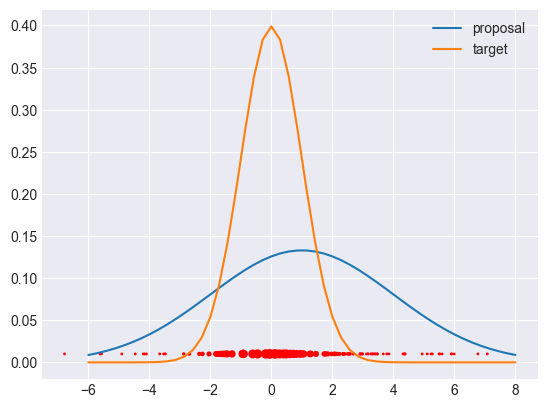

In [4]:
fig, ax = plt.subplots()
x_grid = np.linspace(-6, 8)
q_grid = q.pdf(x_grid)
pi_grid = pi.pdf(x_grid)
ax.plot(x_grid, q_grid, label='proposal')
ax.plot(x_grid, pi_grid, label ='target')
ax.scatter(x_samples, 0.01 + np.zeros(N), s=1 + 10*wgts, c='r');
ax.legend()
plt.grid(visible=True)
plt.show()

The purpose of importance sampling, is to generate an empirical approximation of the distribution $\pi$: we denote this approximation as $\hat{\pi}$. For test function $\phi: \mathbb{R} \rightarrow \mathbb{R}$, we can approximate the expectation using the samples: say we have the test function $\phi(x) = x$: then we have the Monte Carlo importance sampling estimator: 

$$\hat{\pi}(\phi) = \frac{1}{N}\sum_{n=1}^N w(X^i)\phi(X^i)$$

This is our Monte Carlo estimator of the true integral $\pi(\phi) = 0$, based on importance sampling.

In [5]:
np.mean(wgts * x_samples)

0.018346828071362006

It is known that this estimator is unbiased. We can estimate the variance of our estimator, by repeatedly simulating the estimator, then approximating its variance using Monte Carlo:

In [6]:
N_estimators = 100
estimators = np.empty(100)
for i in range(N_estimators):
    N = 100
    x_samples = q.rvs(size=N)
    logwgts = pi.logpdf(x_samples) - q.logpdf(x_samples)
    wgts = np.exp(logwgts)
    estimators[i] = np.mean(wgts * x_samples)


In [7]:
estimators.std()

0.11084521313733754